In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline 

In [2]:
mnist = datasets.load_digits()
X, y = mnist.data, mnist.target

In [3]:
X.shape

(1797, 64)

In [4]:
#mnist
#mnist.data
mnist.data.shape
#mnist.target
#len(mnist.target)

#mnist.data[0].reshape(8,8).shape

(1797, 64)

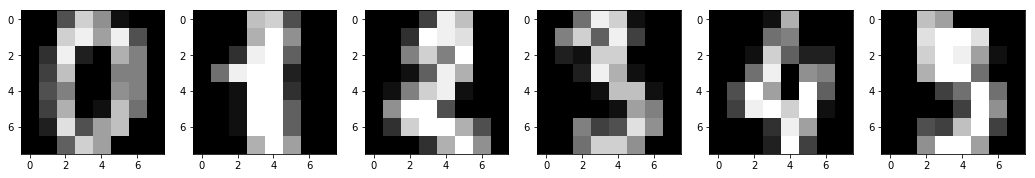

In [5]:
N = 6

plt.figure(figsize=(18,3));
plt_params = dict(cmap=plt.cm.gray, interpolation='nearest', clim=(0, 16))
for k in range(N):
    plt.subplot(1, N, k+1);
    plt.imshow(mnist.data[k].reshape(8,8), **plt_params);

In [6]:
X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [10]:
y

,0
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [32]:
y.reshape()

TypeError: reshape() takes exactly 1 argument (0 given)

In [7]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.1)

    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X_train, y_train)

    print(f"{i}, accuracy: {accuracy_score(y_test, neigh.predict(X_test)):.5f}")

C:\Users\home\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\home\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\home\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


0, accuracy: 0.93140
1, accuracy: 0.94190
2, accuracy: 0.92460


C:\Users\home\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\home\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\home\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


3, accuracy: 0.94870
4, accuracy: 0.91718
5, accuracy: 0.93016


C:\Users\home\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\home\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\home\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


6, accuracy: 0.90729
7, accuracy: 0.93634
8, accuracy: 0.92769
9, accuracy: 0.91965


C:\Users\home\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


In [10]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(neigh, X, y, cv=10)
print(f"accuracy mean: {np.mean(scores):.5f}")
print(f"accuracy std: {np.std(scores):.5f}")

accuracy mean: 0.97779
accuracy std: 0.01594


In [35]:


cv = KFold(n_splits=10, shuffle=True)

cv_score_ls = []
for i in range(10):
    scores = cross_val_score(neigh, X, y, cv=cv)
    print(f"{i}: accuracy mean: {np.mean(scores):.5f};    std: {np.std(scores):.5f}")
    cv_score_ls.append(np.mean(scores))
print("------")
print(f"CV accuracy mean: {np.mean(cv_score_ls):.5f};    std: {np.std(cv_score_ls):.5f}")

0: accuracy mean: 0.98719;    std: 0.00437
1: accuracy mean: 0.98887;    std: 0.00745
2: accuracy mean: 0.98887;    std: 0.00897
3: accuracy mean: 0.98886;    std: 0.00559
4: accuracy mean: 0.98665;    std: 0.00668
5: accuracy mean: 0.98887;    std: 0.00498
6: accuracy mean: 0.98830;    std: 0.00769
7: accuracy mean: 0.98831;    std: 0.00878
8: accuracy mean: 0.98777;    std: 0.00693
9: accuracy mean: 0.98831;    std: 0.00463
------
CV accuracy mean: 0.98820;    std: 0.00074


In [13]:
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold

In [12]:
from sklearn.model_selection import GridSearchCV

def get_grid_search_plot(cv=None):

    if cv is None:
        cv = KFold(n_splits=10, shuffle=True)

    neigh = KNeighborsClassifier()
    gs_values = {'n_neighbors': np.arange(1, 30, 2)}

    fig = plt.figure(figsize=(10,6)) 

    for i in range(1,5):

        gs_acc = GridSearchCV(neigh, param_grid=gs_values, cv=cv, scoring='accuracy')
        gs_acc.fit(X, y)

        best_k = gs_acc.best_params_['n_neighbors']
        best_score = gs_acc.best_score_
        label = f"i={i}: best K={best_k:2}, score={best_score:.5f}"

        plt.plot(gs_values['n_neighbors'], gs_acc.cv_results_["mean_test_score"], label=label)

    plt.ylabel("mean_test_accuracy")
    plt.xlabel("K: n_neighbors")
    plt.legend()
    plt.grid()

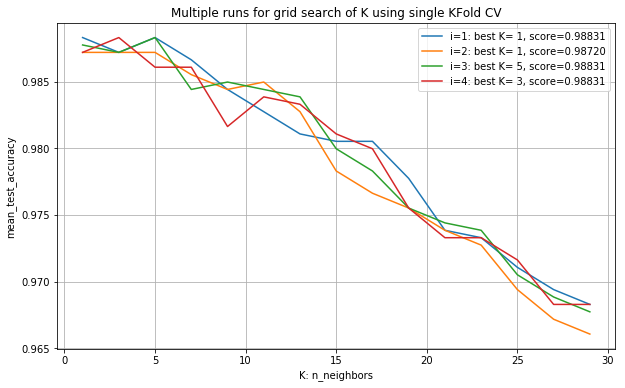

In [37]:
get_grid_search_plot(cv=KFold(n_splits=10, shuffle=True))
plt.title("Multiple runs for grid search of K using single KFold CV")
plt.show()

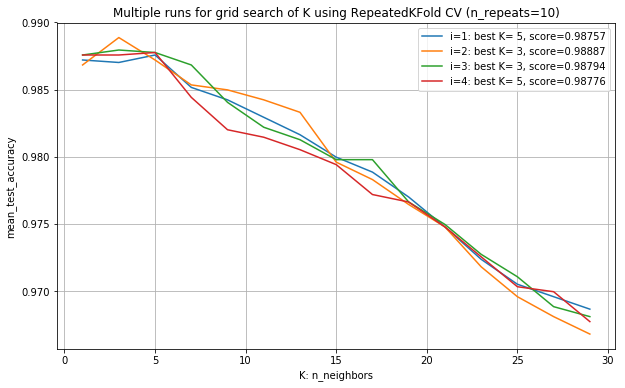

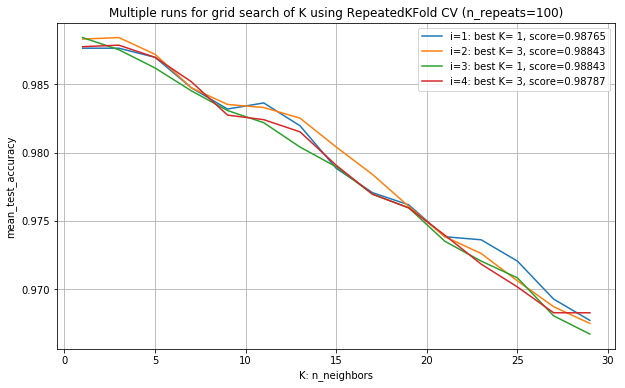

In [ ]:
from sklearn.model_selection import RepeatedKFold

get_grid_search_plot(cv=RepeatedKFold(n_splits=10, n_repeats=3))
plt.title("Multiple runs for grid search of K using RepeatedKFold CV (n_repeats=10)")
plt.show()

get_grid_search_plot(cv=RepeatedKFold(n_splits=10, n_repeats=5))
plt.title("Multiple runs for grid search of K using RepeatedKFold CV (n_repeats=100)")
plt.show()

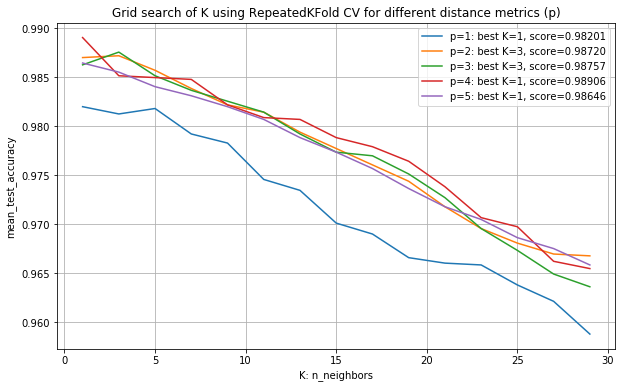

In [14]:
gs_values = {'n_neighbors': np.arange(1, 30, 2)}
cv = RepeatedKFold(n_splits=5, n_repeats=3)

fig = plt.figure(figsize=(10,6)) 

for p in range(1,6):
    neigh = KNeighborsClassifier(p=p)
    gs_acc = GridSearchCV(neigh, param_grid=gs_values, cv=cv, scoring='accuracy')
    gs_acc.fit(X, y)

    best_k = gs_acc.best_params_['n_neighbors']
    best_score = gs_acc.best_score_
    label = f"p={p}: best K={best_k}, score={best_score:.5f}"

    plt.plot(gs_values['n_neighbors'], gs_acc.cv_results_["mean_test_score"], label=label)

plt.title("Grid search of K using RepeatedKFold CV for different distance metrics (p)")
plt.ylabel("mean_test_accuracy")
plt.xlabel("K: n_neighbors")
plt.legend()
plt.grid()

In [15]:
neigh = KNeighborsClassifier()
gs_values = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
    #np.arange(5, 26, 2), 
    'degree': [1,2,3,4],
    "gamma": ['scale', 'distance']
}
cv = RepeatedKFold(n_splits=10, n_repeats=3)
gs_acc = GridSearchCV(neigh, param_grid=gs_values, cv=cv, scoring='accuracy')
gs_acc.fit(X, y)

print(f"best_params: {gs_acc.best_params_}")
print(f"best_accuracy_score: {gs_acc.best_score_:.5f}")

best_params: {'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
best_accuracy_score: 0.98646
